## MNIST Data Classification with RNN/LSTM

**The main two implementation in this notebook is**
+ LSTM and its Implementation Using Tensorflow
+ Applying LSTM on MNIST Dataset

#### Sequence Classification using LSTM on MNIST

#### Building an LSTM with Tensorflow

#### LSTM for Classification


+ Anyway, RNNs are used for model sequences and predict sequential data, It can be used to classify images using LSTM Network.

+ For that consider every image row as a sequence of pixels, and feed tehm to LSTM network for Classification

**Dataset: MNIST Dataset**

+ In MNIST, image shape is 28x28, then handle 28 sequence of 28 steps for every sample

In [2]:
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot= True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


+ The Function *input_data.read_data_sets(...)* loads the entire dataset.

In [4]:
train_images = mnist.train.images
train_labels = mnist.train.labels
test_images = mnist.test.images
test_labels = mnist.test.labels

In [5]:
n_train = train_images.shape[0]
n_test = test_images.shape[0]
dim = train_images.shape[1]
n_classes = train_labels.shape[1]

In [6]:
print("Train Images:", train_images.shape)
print("Train Labels:", train_labels.shape)
print("Test Images:", test_images.shape)
print("Test Labels:", test_labels.shape)

Train Images: (55000, 784)
Train Labels: (55000, 10)
Test Images: (10000, 784)
Test Labels: (10000, 10)


#### Understand the Structure of MNIST Dataset:

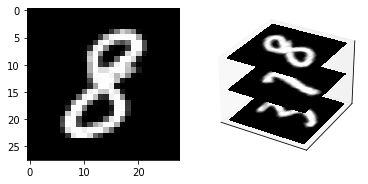

Sample: 110 - Class: [8] - Label Vector: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 
Sample: 111 - Class: [7] - Label Vector: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 
Sample: 112 - Class: [3] - Label Vector: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 


In [8]:
samplesIdx = [110, 111, 112]  

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.imshow(test_images[samplesIdx[0]].reshape([28,28]), cmap='gray')


xx, yy = np.meshgrid(np.linspace(0,28,28), np.linspace(0,28,28))
X =  xx ; Y =  yy
Z =  100*np.ones(X.shape)

img = test_images[77].reshape([28,28])
ax = fig.add_subplot(122, projection='3d')
ax.set_zlim((0,200))


offset=200
for i in samplesIdx:
    img = test_images[i].reshape([28,28]).transpose()
    ax.contourf(X, Y, img, 200, zdir='z', offset=offset, cmap="gray")
    offset -= 100

    ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()


for i in samplesIdx:
    print ("Sample: {0} - Class: {1} - Label Vector: {2} ".format(i, np.nonzero(test_labels[i])[0], test_labels[i]))



#### Simple RNN Consist of 

+ One input layer which consists of 28x28 dimensional input a 128 dimensional hidden layer

+ One Intermediate RNN (LSTM)

+ Output layer which converts a 128 dimensional output of the LSTM to 10 Dimensional (0,1,2,3,4,5,6,7,8,9) output indicating a class label

In [40]:
n_inputs = 28
n_steps = 28
n_hidden = 128
n_classes = 10

learning_rate = 0.005
training_iters = 50000
batch_size = 200
display_step = 10

### Create RNN Network

+ input should be tensor of shape: [batch_size, time_steps, input_dimension] = [?, 28, 28]

In [16]:
x = tf.placeholder(dtype = "float", shape = [None, n_steps, n_inputs], name = "x")

y = tf.placeholder(dtype = "float", shape = [None, n_classes], name = "y")

In [17]:
x

<tf.Tensor 'x_5:0' shape=(?, 28, 28) dtype=float32>

In [18]:
y

<tf.Tensor 'y_5:0' shape=(?, 10) dtype=float32>

#### Create Weights and Biases for ReadOut Layer

In [19]:
weights = {"out": tf.Variable(tf.random_normal([n_hidden, n_classes]))}


biases = {"out": tf.Variable(tf.random_normal([n_classes]))}

In [20]:
weights

{'out': <tf.Variable 'Variable:0' shape=(128, 10) dtype=float32_ref>}

In [21]:
biases

{'out': <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>}

#### Define LSTM Cell with Tensorflow

In [22]:
lstm_cell = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias = 1.0)

In [23]:
lstm_cell

#### dynamic_rnn creates a RNN specified from lstm_cell

In [24]:
output, state = tf.nn.dynamic_rnn(lstm_cell, inputs = x, dtype = tf.float32)

In [26]:
print(output)


Tensor("rnn/transpose_1:0", shape=(?, 28, 128), dtype=float32)


In [27]:
print(state)

LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 128) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 128) dtype=float32>)


+ The output of RNN would be a [100x28x128] matrix.

+ Use a Linear Activation Function to map it to a [?x10] matrix


In [31]:
output = tf.reshape(tf.split(output, 28, axis = 1, num = None, name = "split")[-1],[-1,128])

pred = tf.matmul(output, weights["out"]) + biases["out"]

In [33]:
print(output)

print(pred)

Tensor("Reshape:0", shape=(?, 128), dtype=float32)
Tensor("add:0", shape=(?, 10), dtype=float32)


#### Define Cost Function and Optimizer

In [34]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = pred))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [35]:
print(cost)

Tensor("Mean:0", shape=(), dtype=float32)


In [36]:
print(optimizer)

name: "Adam"
op: "NoOp"
input: "^Adam/update_Variable/ApplyAdam"
input: "^Adam/update_Variable_1/ApplyAdam"
input: "^Adam/update_rnn/basic_lstm_cell/kernel/ApplyAdam"
input: "^Adam/update_rnn/basic_lstm_cell/bias/ApplyAdam"
input: "^Adam/Assign"
input: "^Adam/Assign_1"



#### Accuracy and Evaluation Method

In [37]:
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [38]:
print(correct_pred)

print(accuracy)

Tensor("Equal:0", shape=(?,), dtype=bool)
Tensor("Mean_1:0", shape=(), dtype=float32)


In [42]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:

        # read a batch of 100 images [100 x 784] as batch_x
        # batch_y is a matrix of [100x10]
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # consider each row of the image as one sequence
        # Reshape data to get 28 seq of 28 elements, so that, batxh_x is [100x28x28]
        batch_x = batch_x.reshape((batch_size, n_steps, n_inputs))
    

        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        
        
        if step % display_step == 0:
            # Calculate batch accuracy
            acc = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, n_steps, n_inputs))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: test_data, y: test_label}))

Iter 2000, Minibatch Loss= 1.500624, Training Accuracy= 0.53000
Iter 4000, Minibatch Loss= 0.934401, Training Accuracy= 0.64500
Iter 6000, Minibatch Loss= 0.759182, Training Accuracy= 0.73000
Iter 8000, Minibatch Loss= 0.538279, Training Accuracy= 0.81000
Iter 10000, Minibatch Loss= 0.452597, Training Accuracy= 0.82500
Iter 12000, Minibatch Loss= 0.312564, Training Accuracy= 0.87500
Iter 14000, Minibatch Loss= 0.246869, Training Accuracy= 0.91000
Iter 16000, Minibatch Loss= 0.152510, Training Accuracy= 0.94500
Iter 18000, Minibatch Loss= 0.316857, Training Accuracy= 0.91500
Iter 20000, Minibatch Loss= 0.214933, Training Accuracy= 0.93500
Iter 22000, Minibatch Loss= 0.160940, Training Accuracy= 0.94000
Iter 24000, Minibatch Loss= 0.277701, Training Accuracy= 0.90500
Iter 26000, Minibatch Loss= 0.157527, Training Accuracy= 0.96500
Iter 28000, Minibatch Loss= 0.228792, Training Accuracy= 0.92500
Iter 30000, Minibatch Loss= 0.090240, Training Accuracy= 0.97000
Iter 32000, Minibatch Loss= 0

**The Accuracy of the Model is 97.65%**

In [43]:
sess.close()